<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRJVkCTXCbHiInt4pim_xsxX17ilRFKVHCOsA&usqp=CAU" width="50%"></center>

### Import libraries
----------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")

### Load Data
-----

In [2]:
train=pd.read_csv('/kaggle/input/ford-stay-alert/fordTrain.csv')
test=pd.read_csv('/kaggle/input/ford-stay-alert/fordTest.csv')

### Understanding the Data 

In [3]:
train.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.96,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.98,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.97,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.99,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,102.07,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757


In [4]:
test.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.9435,1000,60.0,0.302277,508,118.110,0,0.0,0.0,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.3212,1000,60.0,0.302277,508,118.110,0,0.0,0.0,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.5140,1000,60.0,0.302277,508,118.110,0,0.0,0.0,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.2615,1000,60.0,0.302277,508,118.110,0,0.0,0.0,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.3666,1000,60.0,0.302277,504,119.048,0,0.0,0.0,4,8,0.015938,328,1,1,1,65,0.0,108.57,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

In [6]:
train.shape

(604329, 33)

In [7]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum().values*100
    sum['missing%'] = (df.isna().sum().values*100)/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    #sum['skew'] = df.skew().values
    desc = pd.DataFrame(df.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

summary(train).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,count,min,max,mean
TrialID,int64,0,0.000000,500,604329,0.000000,510.000000,250.167657
ObsNum,int64,0,0.000000,1211,604329,0.000000,1210.000000,603.841765
IsAlert,int64,0,0.000000,2,604329,0.000000,1.000000,0.578799
P1,float64,0,0.000000,113345,604329,-22.481200,101.351000,35.449020
P2,float64,0,0.000000,141467,604329,-45.629200,71.173700,11.996525
P3,int64,0,0.000000,409,604329,504.000000,2512.000000,1026.671035
P4,float64,0,0.000000,409,604329,23.885300,119.048000,64.061965
P5,float64,0,0.000000,1219,604329,0.038920,27.202200,0.178923
P6,int64,0,0.000000,419,604329,128.000000,228812.000000,845.384610
P7,float64,0,0.000000,419,604329,0.262224,468.750000,77.887628


In [8]:
train.isna().sum()

TrialID    0
ObsNum     0
IsAlert    0
P1         0
P2         0
P3         0
P4         0
P5         0
P6         0
P7         0
P8         0
E1         0
E2         0
E3         0
E4         0
E5         0
E6         0
E7         0
E8         0
E9         0
E10        0
E11        0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
dtype: int64

#### Dropping below two features as they are unique for all the entries

In [9]:
train.drop(['TrialID','ObsNum'],axis=1,inplace=True)

### Correlation heatmap
---

<Axes: >

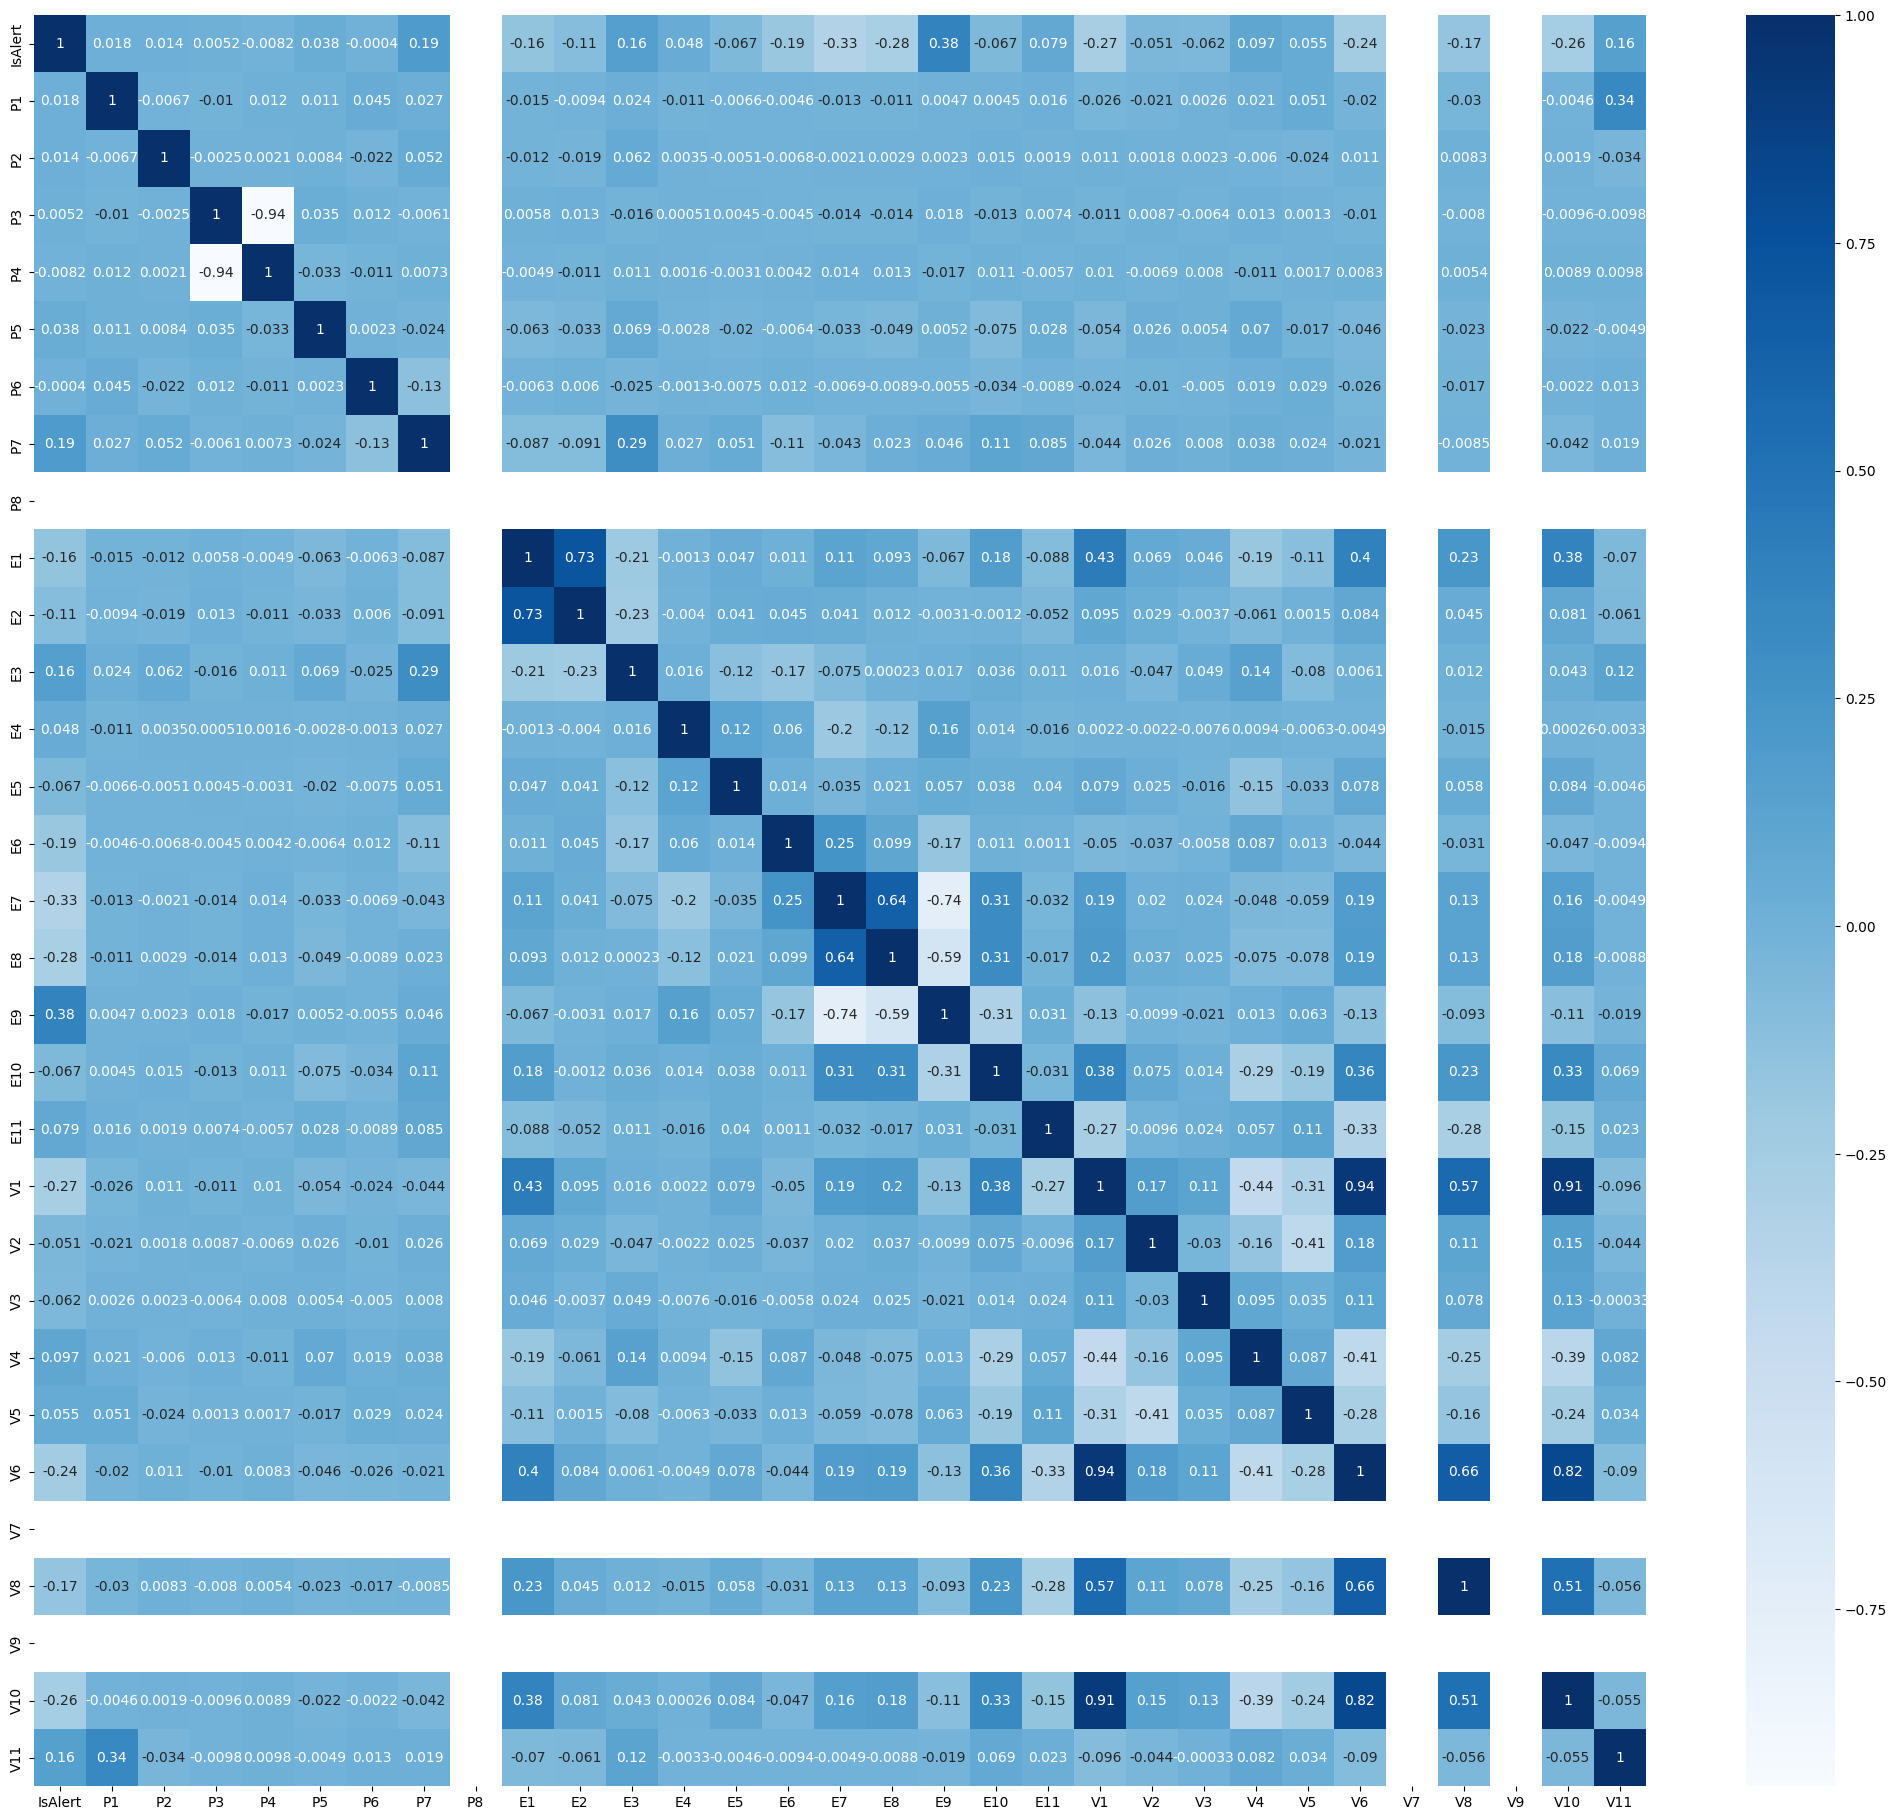

In [10]:
plt.figure(figsize=(26,23))
sns.heatmap(train.corr(),annot=True,cmap='Blues')

### Distribution Plot
---

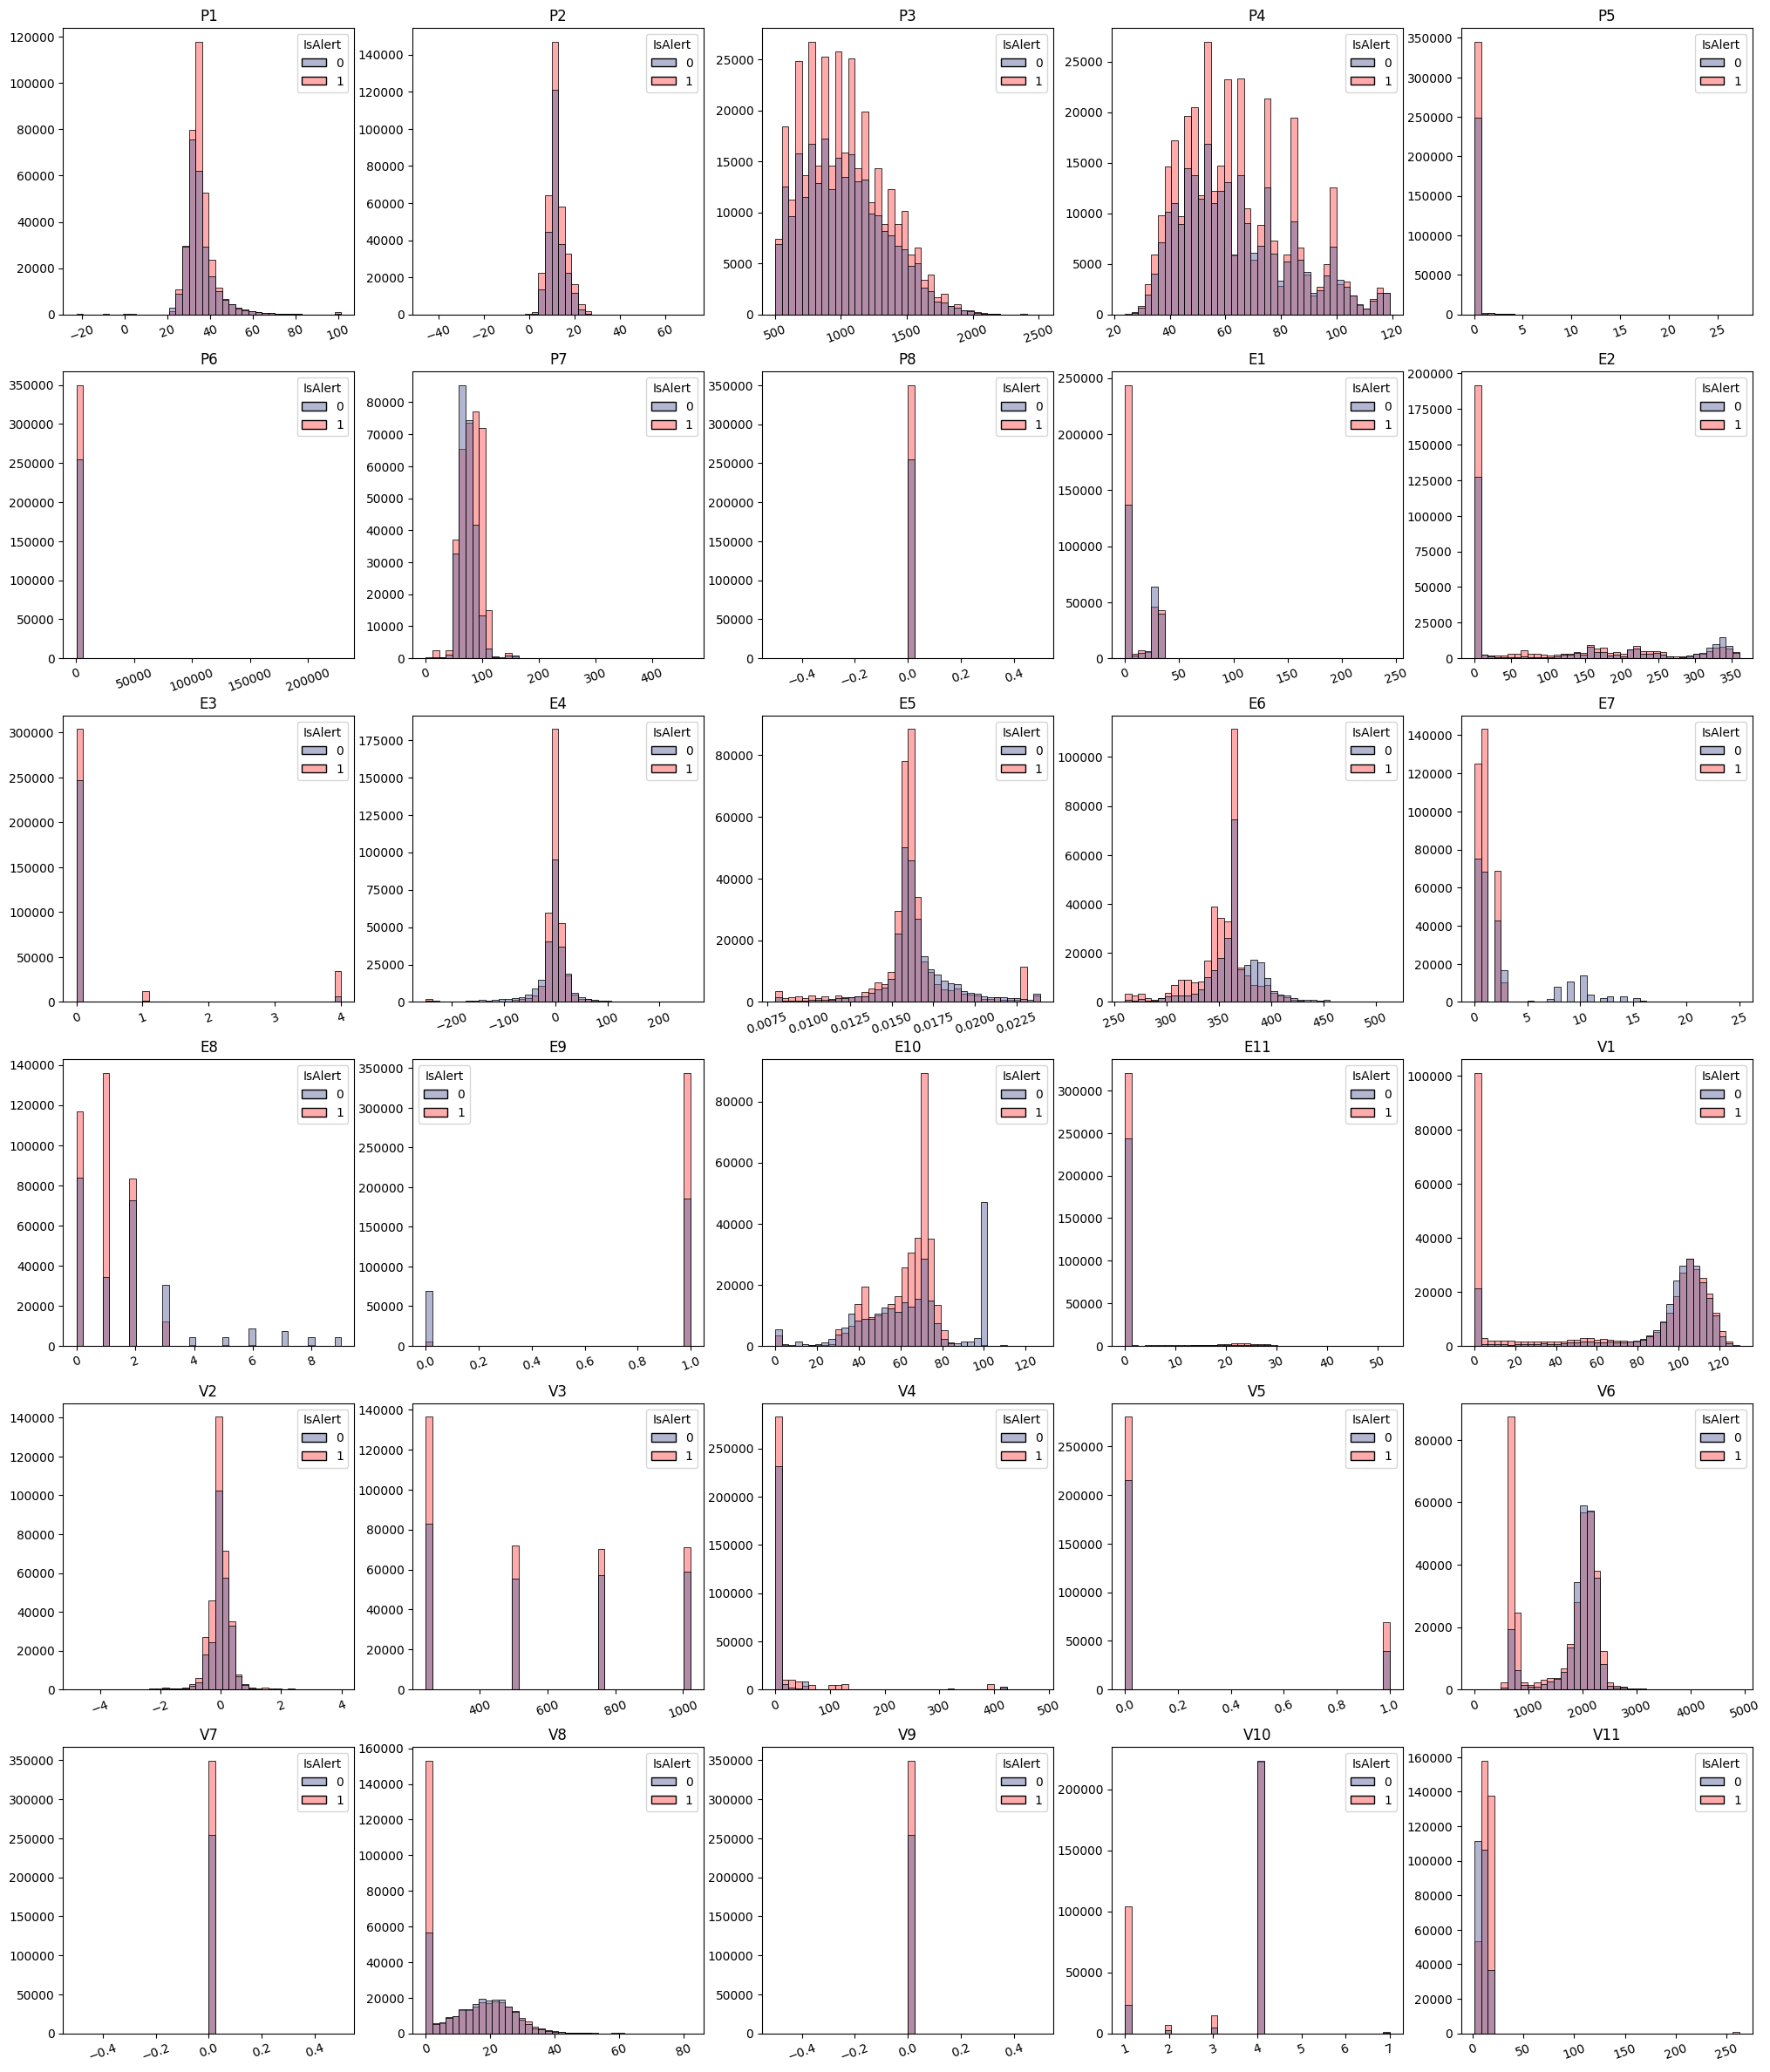

In [11]:
numerical = [feature for feature in train.columns if train[feature].dtype in ['int64', 'float64']]
df = train[numerical].drop(['IsAlert'],axis=1)

fig = plt.figure(figsize = (25, 35))

i=1
for n in df.columns:
    plt.subplot(7, 5, i)
    ax = sns.histplot(x = train[n],hue = train['IsAlert'], palette = ['#676FA3', '#FF5959'], bins = 40)
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

<b>As the data is fully received from the sensors we can't visualize more and understand from this dataset</b> 

### Train Test Split
---

In [12]:
x=train.drop('IsAlert',axis=1)
y=train['IsAlert']

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=23,test_size=.2)

In [14]:
print(xtrain.shape)
print(ytrain.shape)
print(ytest.shape)
print(xtest.shape)

(483463, 30)
(483463,)
(120866,)
(120866, 30)


### User-defined function for evaluation of models
---

In [15]:
def report(actual,pred):
    acc_score=accuracy_score(actual,pred)
    con_mat=confusion_matrix(actual,pred)
    class_rep=classification_report(actual,pred)
    print("Accuracy of model is", round((acc_score*100),2),'%')
    print('\n ',con_mat)
    print('\n',class_rep)

### Model Building
---

#### Logistic Regression

In [16]:
log=LogisticRegression()
log.fit(xtrain,ytrain)
train_log=log.predict(xtrain)
test_log=log.predict(xtest)
report(ytrain,train_log)
report(ytest,test_log)

Accuracy of model is 71.82 %

  [[131283  72351]
 [ 63907 215922]]

               precision    recall  f1-score   support

           0       0.67      0.64      0.66    203634
           1       0.75      0.77      0.76    279829

    accuracy                           0.72    483463
   macro avg       0.71      0.71      0.71    483463
weighted avg       0.72      0.72      0.72    483463

Accuracy of model is 71.51 %

  [[32758 18152]
 [16277 53679]]

               precision    recall  f1-score   support

           0       0.67      0.64      0.66     50910
           1       0.75      0.77      0.76     69956

    accuracy                           0.72    120866
   macro avg       0.71      0.71      0.71    120866
weighted avg       0.71      0.72      0.71    120866



#### Decision Tree

In [17]:
dtree=DecisionTreeClassifier(max_depth=13)
dtree.fit(xtrain,ytrain)
pred_train_dt=dtree.predict(xtrain)
pred_test_dt=dtree.predict(xtest)
report(ytrain,pred_train_dt)
report(ytest,pred_test_dt)

Accuracy of model is 94.75 %

  [[183794  19840]
 [  5519 274310]]

               precision    recall  f1-score   support

           0       0.97      0.90      0.94    203634
           1       0.93      0.98      0.96    279829

    accuracy                           0.95    483463
   macro avg       0.95      0.94      0.95    483463
weighted avg       0.95      0.95      0.95    483463

Accuracy of model is 94.39 %

  [[45690  5220]
 [ 1566 68390]]

               precision    recall  f1-score   support

           0       0.97      0.90      0.93     50910
           1       0.93      0.98      0.95     69956

    accuracy                           0.94    120866
   macro avg       0.95      0.94      0.94    120866
weighted avg       0.94      0.94      0.94    120866



#### Random Forest

In [18]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
preds_train_rf=rf.predict(xtrain)
preds_test_rf=rf.predict(xtest)
report(ytrain,preds_train_rf)
report(ytest,preds_test_rf)

Accuracy of model is 100.0 %

  [[203634      0]
 [     0 279829]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    203634
           1       1.00      1.00      1.00    279829

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463

Accuracy of model is 99.48 %

  [[50347   563]
 [   65 69891]]

               precision    recall  f1-score   support

           0       1.00      0.99      0.99     50910
           1       0.99      1.00      1.00     69956

    accuracy                           0.99    120866
   macro avg       1.00      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



#### Ada Boost

In [19]:
ada=AdaBoostClassifier(n_estimators=200)
ada.fit(xtrain,ytrain)
preds_ada_train=ada.predict(xtrain)
preds_ada_test=ada.predict(xtest)
report(ytrain,preds_ada_train)
report(ytest,preds_ada_test)

Accuracy of model is 86.65 %

  [[163370  40264]
 [ 24301 255528]]

               precision    recall  f1-score   support

           0       0.87      0.80      0.84    203634
           1       0.86      0.91      0.89    279829

    accuracy                           0.87    483463
   macro avg       0.87      0.86      0.86    483463
weighted avg       0.87      0.87      0.87    483463

Accuracy of model is 86.5 %

  [[40786 10124]
 [ 6192 63764]]

               precision    recall  f1-score   support

           0       0.87      0.80      0.83     50910
           1       0.86      0.91      0.89     69956

    accuracy                           0.87    120866
   macro avg       0.87      0.86      0.86    120866
weighted avg       0.87      0.87      0.86    120866



#### Gradient Boost

In [20]:
gb=GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
preds_gb_train=gb.predict(xtrain)
preds_gb_test=gb.predict(xtest)
report(ytrain,preds_gb_train)
report(ytest,preds_gb_test)

Accuracy of model is 89.11 %

  [[165392  38242]
 [ 14386 265443]]

               precision    recall  f1-score   support

           0       0.92      0.81      0.86    203634
           1       0.87      0.95      0.91    279829

    accuracy                           0.89    483463
   macro avg       0.90      0.88      0.89    483463
weighted avg       0.89      0.89      0.89    483463

Accuracy of model is 88.99 %

  [[41290  9620]
 [ 3687 66269]]

               precision    recall  f1-score   support

           0       0.92      0.81      0.86     50910
           1       0.87      0.95      0.91     69956

    accuracy                           0.89    120866
   macro avg       0.90      0.88      0.88    120866
weighted avg       0.89      0.89      0.89    120866



#### XGBoost

In [21]:
import xgboost as xgb
xbg_classifier=xgb.XGBClassifier(n_estimators=160,max_depth=15,tree_method='hist')
xbg_classifier.fit(xtrain,ytrain)
preds_train_xgb=xbg_classifier.predict(xtrain)
preds_test_xgb=xbg_classifier.predict(xtest)
report(ytrain,preds_train_xgb)
report(ytest,preds_test_xgb)

Accuracy of model is 100.0 %

  [[203630      4]
 [     1 279828]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    203634
           1       1.00      1.00      1.00    279829

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463

Accuracy of model is 99.71 %

  [[50613   297]
 [   59 69897]]

               precision    recall  f1-score   support

           0       1.00      0.99      1.00     50910
           1       1.00      1.00      1.00     69956

    accuracy                           1.00    120866
   macro avg       1.00      1.00      1.00    120866
weighted avg       1.00      1.00      1.00    120866



### Evaluation
---

In [22]:
acc=pd.DataFrame(columns=['Model','acc_type','acc'])
acc['Model']=['LogisticReg','LogisticReg','Dtree','Dtree','RandomForest','RandomForest','Ada Boost','Ada Boost','Gradient Boost','Gradient Boost','Xgboost','Xgboost']
acc['acc_type']=['train','test','train','test','train','test','train','test','train','test','train','test']

In [23]:
acc['acc']=[accuracy_score(ytrain,train_log)*100,
            accuracy_score(ytest,test_log)*100,
            accuracy_score(ytrain,pred_train_dt)*100,
            accuracy_score(ytest,pred_test_dt)*100,
            accuracy_score(ytrain,preds_train_rf)*100,
            accuracy_score(ytest,preds_test_rf)*100,
            accuracy_score(ytrain,preds_ada_train)*100,
            accuracy_score(ytest,preds_ada_test)*100,
            accuracy_score(ytrain,preds_gb_train)*100,
            accuracy_score(ytest,preds_gb_test)*100,
            accuracy_score(ytrain,preds_train_xgb)*100,
            accuracy_score(ytest,preds_test_xgb)*100]

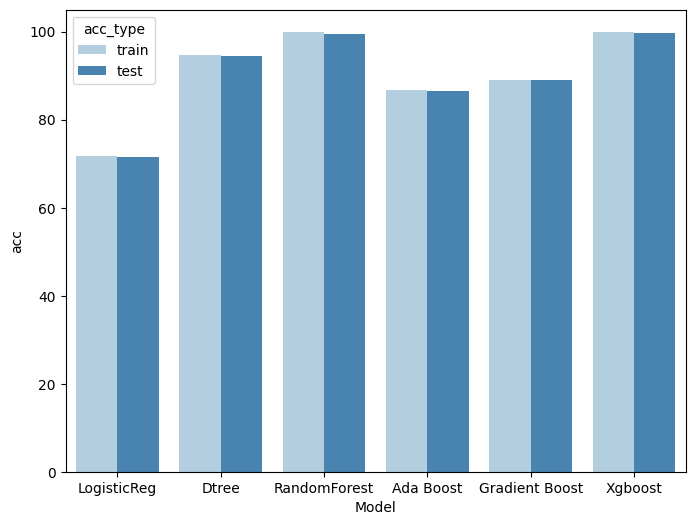

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(x='Model',y='acc',hue='acc_type',data=acc,palette='Blues')
plt.show()

Even though Random forest and Xgboost perform equally after considering the precision, f1 score, recall, and confusion matrix we can tell that xgboost is performing better than Random forest

### Prediction with Test data
---

In [25]:
test.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.9435,1000,60.0,0.302277,508,118.110,0,0.0,0.0,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.3212,1000,60.0,0.302277,508,118.110,0,0.0,0.0,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.5140,1000,60.0,0.302277,508,118.110,0,0.0,0.0,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.2615,1000,60.0,0.302277,508,118.110,0,0.0,0.0,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.3666,1000,60.0,0.302277,504,119.048,0,0.0,0.0,4,8,0.015938,328,1,1,1,65,0.0,108.57,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459


In [26]:
test_x=test.iloc[:,3:]

In [27]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120840 entries, 0 to 120839
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   P1      120840 non-null  float64
 1   P2      120840 non-null  float64
 2   P3      120840 non-null  int64  
 3   P4      120840 non-null  float64
 4   P5      120840 non-null  float64
 5   P6      120840 non-null  int64  
 6   P7      120840 non-null  float64
 7   P8      120840 non-null  int64  
 8   E1      120840 non-null  float64
 9   E2      120840 non-null  float64
 10  E3      120840 non-null  int64  
 11  E4      120840 non-null  int64  
 12  E5      120840 non-null  float64
 13  E6      120840 non-null  int64  
 14  E7      120840 non-null  int64  
 15  E8      120840 non-null  int64  
 16  E9      120840 non-null  int64  
 17  E10     120840 non-null  int64  
 18  E11     120840 non-null  float64
 19  V1      120840 non-null  float64
 20  V2      120840 non-null  float64
 21  V3      12

In [28]:
test['IsAlert']=xbg_classifier.predict(test_x)

### Principle Component Analysis
---

In [29]:
from sklearn.decomposition import PCA
pca=PCA(n_components=15)
pca.fit(xtrain)

PCA(n_components=15)

In [30]:
xtrain_pca=pca.fit_transform(xtrain)
xtest_pca=pca.transform(xtest)

In [31]:
print(xtrain_pca.shape)
print(xtest_pca.shape)

(483463, 15)
(120866, 15)


In [32]:
pd.DataFrame(xtrain_pca).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-132.864657,565.613243,493.254731,-350.404568,230.457382,24.762402,17.920370,-5.168156,7.731758,2.201963,-4.519510,1.504809,4.972987,-1.583129,-0.159706
1,-152.191045,263.015693,-321.127677,-353.276112,-108.452507,2.851219,-2.585349,11.185267,8.774544,-1.226274,-6.938948,-4.645321,-6.450528,-5.077490,-3.173934
2,-13.731452,462.262611,-433.524412,141.332132,-107.249087,-7.678270,-32.536543,47.229293,16.314842,-22.325118,9.455397,-6.089665,0.341304,-8.102732,-1.239732
3,-63.724691,218.024104,-209.264950,-102.891490,-106.461307,-5.784486,1.085711,-8.427478,-14.440243,7.638950,-13.468311,-2.455278,2.159515,-4.938131,-0.735693
4,-164.323408,404.478570,223.695526,433.447505,55.652197,-13.655797,8.324857,10.018616,10.737302,3.160802,-4.361947,4.284656,-7.911278,11.402432,-3.550094


In [33]:
pca.explained_variance_ratio_

array([9.15576589e-01, 5.50130638e-02, 1.36693732e-02, 1.25059775e-02,
       2.30383375e-03, 4.67273736e-04, 1.80681271e-04, 1.06003433e-04,
       5.13082349e-05, 4.08992366e-05, 3.14541091e-05, 1.50657903e-05,
       1.02974972e-05, 9.25184599e-06, 6.19394327e-06])

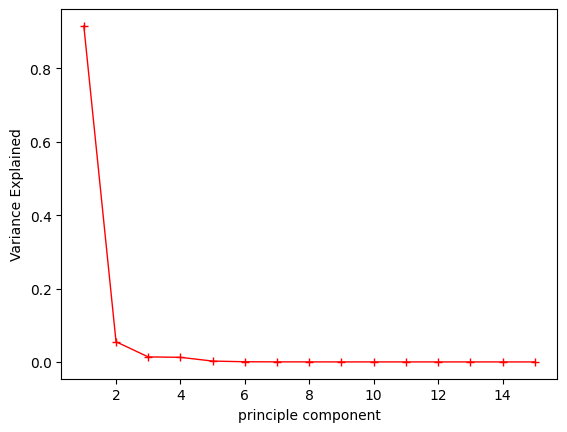

In [34]:
pc_values=np.arange(pca.n_components_)+1
plt.plot(pc_values,pca.explained_variance_ratio_,'+-',linewidth=1,color='red')
plt.xlabel('principle component')
plt.ylabel('Variance Explained')
plt.show()

### Modelling after PCA
---

In [35]:
rf=RandomForestClassifier()
rf.fit(xtrain_pca,ytrain)
preds_train_rf_pca=rf.predict(xtrain_pca)
preds_test_rf_pca=rf.predict(xtest_pca)
report(ytrain,preds_train_rf_pca)
report(ytest,preds_test_rf_pca)

Accuracy of model is 100.0 %

  [[203634      0]
 [     0 279829]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    203634
           1       1.00      1.00      1.00    279829

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463

Accuracy of model is 98.77 %

  [[49695  1215]
 [  277 69679]]

               precision    recall  f1-score   support

           0       0.99      0.98      0.99     50910
           1       0.98      1.00      0.99     69956

    accuracy                           0.99    120866
   macro avg       0.99      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



In [36]:
xbg_classifier.fit(xtrain_pca,ytrain)
preds_train_xgb_pca=xbg_classifier.predict(xtrain_pca)
preds_test_xgb_pca=xbg_classifier.predict(xtest_pca)
report(ytrain,preds_train_xgb_pca)
report(ytest,preds_test_xgb_pca)

Accuracy of model is 100.0 %

  [[203631      3]
 [     6 279823]]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    203634
           1       1.00      1.00      1.00    279829

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463

Accuracy of model is 99.16 %

  [[50121   789]
 [  226 69730]]

               precision    recall  f1-score   support

           0       1.00      0.98      0.99     50910
           1       0.99      1.00      0.99     69956

    accuracy                           0.99    120866
   macro avg       0.99      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



### Evalauation after PCA

In [37]:
acc1=pd.DataFrame(columns=['Model','acc_type','acc'])
acc1['Model']=['RandomForest','RandomForest','Xgboost','Xgboost']
acc1['acc_type']=['train','test','train','test']
acc1['acc']=[accuracy_score(ytrain,preds_train_rf_pca)*100,
            accuracy_score(ytest,preds_test_rf_pca)*100,
            accuracy_score(ytrain,preds_train_xgb_pca)*100,
            accuracy_score(ytest,preds_test_xgb_pca)*100]

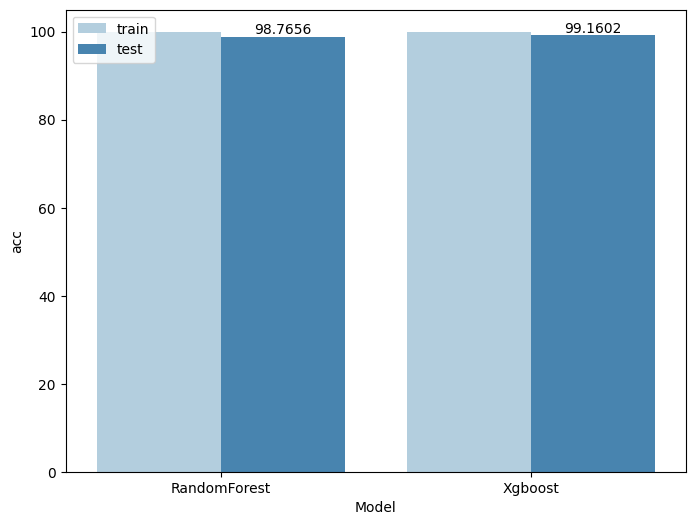

In [38]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x='Model',y='acc',hue='acc_type',data=acc1,palette='Blues')
ax.bar_label(ax.containers[1])
plt.legend(loc=2)
plt.show()

Even though the accuracy has reduced in a very small scale but another thing to consider is the Dimesionality, where we have reduced the dimension from 30 features to 15 features but the model is not failing to give the very close accuracy as previous which is an advantange